# Homework 6: 

**DUE:** 5pm EST, April 9, 2020



### **Conceptual:** Short answer questions. Be concise

---

1. Let us consider the "curse of dimensionality" (i.e., when the ratio of predictor variables, p, to observations, n, is high) in the context of kNN. Answer the following:

<br>

(a) Suppose that we have a set of observations, each with measurements on p = 1 feature, X. We assume that X is uniformly (evenly) distributed between 0 and 1. Associated with each observation is a response value. Suppose that we wish to predict a test observation’s response using only observations that are within 10% of the range of X closest to that test observation. For instance, in order to predict the response for a test observation with X = 0.6, we will use observations in the range [0.55,0.65]. On average, what fraction of the available observations will we use to make the prediction?

**Answer:**
X is between 0 and 1, and the range of observations used to predict a response is X +/- .05, which represents 10 percent of the total range of X for any test observation. Thus, on average, about 10 percent of the available obesrvations will be used to make the prediction. 


(b) Suppose that we have a set of observations, each with measurements on p = 2 features, X1 and X2. We assume that (X1,X2) are uniformly distributed between 0 and 1. We wish to predict a test observation’s response using only observations that are within 10% of the range of X1 and within 10% of the range of X2 closest to that test observation. For instance, in order to predict the response for a test observation with X1 = 0.6 and X2 = 0.35, we will use observations in the range [0.55, 0.65] for X1 and in the range [0.3, 0.4] for X2. On average, what fraction of the available observations will we use to make the prediction?

**Answer:**
When p=2, 1 percent of the available observations will be used to make the prediction. If we think of the 10 percent of the range of X1 and 10 percent of the range of X2 as probabilities that a given observation will be used to make the prediction, then the probability that an observation will be used if it falls in BOTH of those ranges is 10 percent times 10 percent (or .10^p). 

(c) Now suppose that we have a set of observations on p = 100 features. Again the observations are uniformly distributed on each feature, and again each feature ranges in value from 0 to 1. We wish to predict a test observation’s response using observations within the 10% of each feature’s range that is closest to that test observation. What fraction of the available observations will we use to make the prediction?

**Answer:**
When p=100, the fraction of available observations used to make the prediction is .10^100 (really close to 0!). 




(c)  Using your answers to parts (a)–(c), argue that a drawback of KNN when p is large is that there are very few training observations “near” any given test observation.

**Answer:**
We see in parts (a) to (c) that as p increases, the fraction of available observations to make the prediction grows smaller (while the number of observations remains constant). One way to think about this is that the space of possible training observations to use surrounding the test observation gets smaller. Thus, there fewer training observations near any given test observation as p grows.


---

2. Explain how k-fold cross-validation is implemented. What are the advantages and disadvantages of k-fold cross-validation relative to LOOCV?


**Answer:**
K-fold cross-validation starts by taking m unique observations, where m is the ratio of the number of observations to the number of folds (k). Next, we create a two sets of data: (1) a test set of all m observations and (2) a training set of all observations outside of those m. Then, we fit the model to the training set and evaluate this model by either examining the RSS for all m observations within a fold or storing m predicted values in that fold. We repeat these steps for k number of folds. Lastly, we calculate either the cross validated error or the correlation between the observed and predicted values. K-fold CV is less computationally costly than LOOCV and is less sensitive to high leverage points and negative bias.


---

3. Differentiate the bootstrap from a permutation test. Describe each and when is it appropriate to each.

**Answer:**
Boostrap and permutation tests are both resampling procedures, where the major difference is how the data points are scrambled: bootstrapping allows data points to be drawn on more than once, while permutation tests resample without replacement. Bootstrapping is appropriate when we are interested in the certainty of a given statistic (confidence intervals). Permutation tests allow us to determine our null hypothesis by examining the data itself; we can generate a null distribution and ask what the probability of observing our data along this distribution is (p-values).



---

### **Applied:** Show your code & plots

We will use both datasets from the HCP dataset for these problems. Include conceptual answers to questions as comments in code cells. You should use the tidyverse and class libraries for this assignment, as well as the data table for the HCP data set.

4. Use kNN to build a classifier that for predicting Gender using the unadjusted Flanker task performance (Flanker_unadj). 

(a) Split the data set up into 1006 training observations and 200 test observations. Clasffiy using kNN with k = 5. Show your classification accuracy as a predicted vs. observed table, and report the mean classification accuracy.

In [3]:
# -------------------------------
# Question 4
# -------------------------------
d<-read.csv('/Users/shirleyduong/Desktop/Duong_DSPN_S20/unrestricted_trimmed_1_7_2020_10_50_44.csv')
library(tidyverse)
library(class)

#note that knn from the class package does not use the function or form syntax and requires the predictors to be in their own dataframe
d<-select(d,Subject,Gender,Flanker_Unadj) 
d$Gender=as.numeric(d$Gender)-1 #assign numeric values to the factors: 0=female, 1=male
set.seed(13)
size=sample(nrow(d), 1006) #generate training and test sets
train<-d[size,]
test<-d[-size,]
gender<-d[size,4] #make a factor vector
predicted_k5<-knn(train, test, train$Gender, k=5,l=0,prob=F,use.all=T) #function directly returns classifications, so add to test set

comparison = data.frame(predicted_k5, test$Gender) #create a confusion matrix with the predicted and actual values
colnames(comparison) = c('predicted', 'actual')
table(comparison)
mean(comparison$predicted == comparison$actual) #find prediction accuracy


# (a) The classification accuracy is 54.5.


         actual
predicted  0  1
        0 61 46
        1 45 48

[1] 0.545

(b) Now repeat your analysis using a range of k's, from 1-100. Plot the performance of the classifier (i.e., accuracy) for each value of k. Which value gives you the highest accuracy and what is the accuracy for that best k?

[1] 0.6

[1] 14

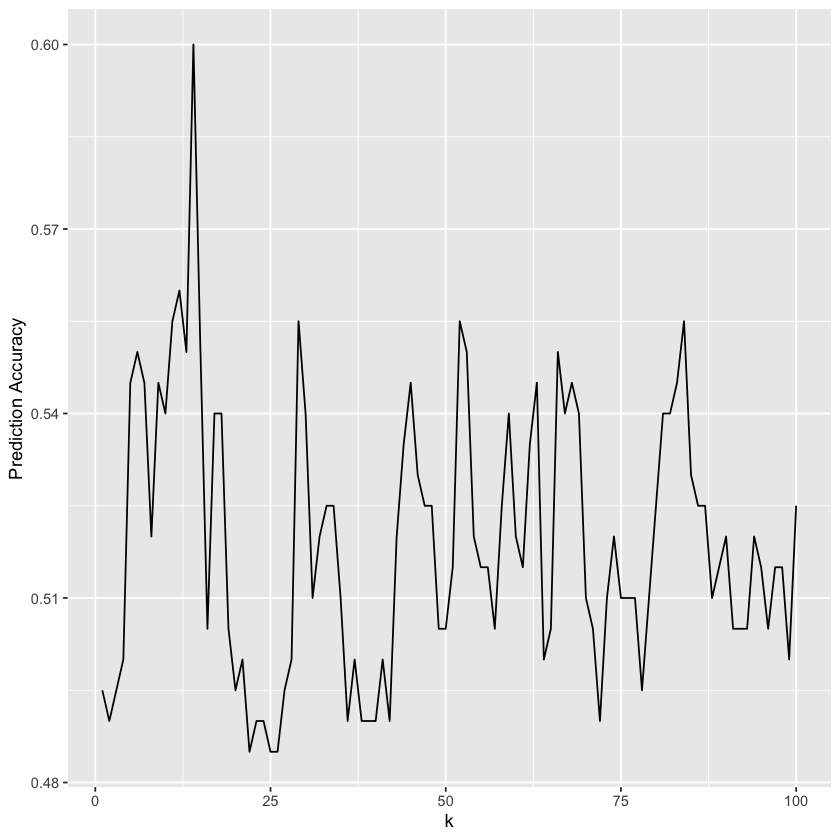

In [6]:
set.seed(42)
k_values = 1:100
acc_k = rep(x = 0, times = length(k_values))

for (i in seq_along(k_values)) {
  pred_val = knn(train, 
             test, 
             train$Gender, 
             k     = k_values[i])
  #acc_k = mean(pred_val==test$Gender)
  acc_k[i] <- mean(pred_val==test$Gender)
}

acc_data <- data.frame(k_values,acc_k) #make dataframe with k and prediction accuracy

library(ggplot2)
ggplot(acc_data,aes(k_values,acc_k))+geom_line()+xlab("k")+ylab("Prediction Accuracy")
max(acc_k)
acc_data$k_values[acc_data$acc_k==max(acc_k)]

# (b) k=14 corresponds to the highest accuracy of .60.


5. Use bootstrapping to estimate the confidence on the regression coefficients for a logistic regression model using Flanker_unadj scores to predict Gender. Use 5000 iterations off the bootstrap. Report whether any of the coefficients are statistically significant using the standard error estimates off of the bootstrap.

In [7]:
# -------------------------------
# Question 5
# -------------------------------
library(boot)
boot.fn <- function(data, index){  
  return(coef(glm(Gender~Flanker_Unadj, data=d, family="binomial", subset=index)))}

booty = boot(d ,boot.fn ,R=5000)
print(booty) #t1=intercept, t2=flanker coefficient

#The standard errors are relatively small compared to the estimates, suggesting significant coefficients.



ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = d, statistic = boot.fn, R = 5000)


Bootstrap Statistics :
       original        bias    std. error
t1* -3.44174036 -1.254713e-02 0.685765014
t2*  0.02931477  9.830986e-05 0.006115482
